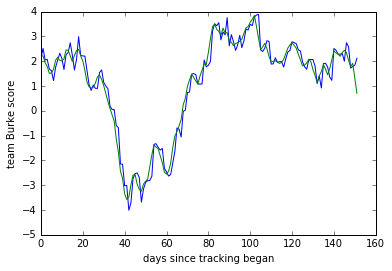

In [2]:
# %load burkechart.py
%matplotlib inline 
#!/usr/bin/env python2
"""
Created on Sun Aug 13 21:32:38 2017

@author: martin
"""
import numpy as np
import matplotlib.pyplot as plt
from access_nba_data import games_query, epochtime
from burke_solver import burke_calc
ave_period=3

#Moving averages, via StackOverflow
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

#set start date and date related variables
start_date=epochtime('Dec 1 2015')
end_date=epochtime('May 1 2016')
calc_date=start_date
daysecs=24*60*60
monthsecs=daysecs*30

#placeholder array
all_burke_calcs=[]

while calc_date < end_date:
    temp_burke_calc=burke_calc(games_query(calc_date-monthsecs,calc_date))
    temp_burke_calc.tolist()
    all_burke_calcs.append(temp_burke_calc)
    calc_date+=daysecs

all_burke_calcs=np.asarray(all_burke_calcs)
#Not used, too jerky at end
ave_burke_calcs=np.zeros_like(all_burke_calcs)
#
##calculate ave_burke_calcs
for i in range(0,len(all_burke_calcs[0,:])):
     ave_burke_calcs[:,i]=runningMeanFast(all_burke_calcs[:,i],ave_period)
    
plot_team_id=3
plt.plot(all_burke_calcs[:,plot_team_id])
plt.plot(ave_burke_calcs[:,plot_team_id])
plt.ylabel('team Burke score')
plt.xlabel('days since tracking began')
plt.show()
    